In [2]:
import arff
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
import re

arff_file = arff.load(open('output_emobase.arff', 'r'))
data = np.array(arff_file['data'])
df = pd.DataFrame(data)


"\narff_file = arff.load(open('/home/veerlosar/Desktop/output_emobase.arff', 'r'))\ndata = np.array(arff_file['data'])\ndf = pd.DataFrame(data)\n"

In [ ]:
directory = os.fsencode('ERHS/neutral3/')


for file in os.listdir(directory):
    filename = os.fsdecode(file)
    command = '/opensmile-2.3.0/SMILExtract -C /opensmile-2.3.0/config/emobase.conf -I /ERHS/neutral3/{} -O /ERHS/neutral3_arff/{}.arff'.format(filename, filename[:-4])
    process = subprocess.Popen(command.split())
    output, error = process.communicate()

In [118]:
p = os.fsencode('/ERHS/neutral3_arff/')

for file in os.listdir(p):
    filename = os.fsdecode(file)
    arff_ = arff.load(open('/ERHS/neutral3_arff/{}'.format(filename), 'r'))
    data_ = np.array(arff_['data'])
    df_ = pd.DataFrame(data_)
    df = df.append(df_, ignore_index=True)

In [133]:
arff_file['attributes'].append(('class', 'NUMERIC'))
df.columns = [i[0] for i in arff_file['attributes']]

In [135]:
df.index = np.arange(0, len(df))

In [157]:
df.to_csv('df.csv')

In [141]:
df.drop(['name', 'frameTime'], axis=1, inplace=True)

In [160]:
df = df.astype('float', inplace=True)

['pcm_intensity_sma_max',
 'pcm_intensity_sma_min',
 'pcm_intensity_sma_range',
 'pcm_intensity_sma_maxPos',
 'pcm_intensity_sma_minPos',
 'pcm_intensity_sma_amean',
 'pcm_intensity_sma_linregc1',
 'pcm_intensity_sma_linregc2',
 'pcm_intensity_sma_linregerrA',
 'pcm_intensity_sma_linregerrQ',
 'pcm_intensity_sma_stddev',
 'pcm_intensity_sma_skewness',
 'pcm_intensity_sma_kurtosis',
 'pcm_intensity_sma_quartile1',
 'pcm_intensity_sma_quartile2',
 'pcm_intensity_sma_quartile3',
 'pcm_intensity_sma_iqr1-2',
 'pcm_intensity_sma_iqr2-3',
 'pcm_intensity_sma_iqr1-3',
 'pcm_loudness_sma_max',
 'pcm_loudness_sma_min',
 'pcm_loudness_sma_range',
 'pcm_loudness_sma_maxPos',
 'pcm_loudness_sma_minPos',
 'pcm_loudness_sma_amean',
 'pcm_loudness_sma_linregc1',
 'pcm_loudness_sma_linregc2',
 'pcm_loudness_sma_linregerrA',
 'pcm_loudness_sma_linregerrQ',
 'pcm_loudness_sma_stddev',
 'pcm_loudness_sma_skewness',
 'pcm_loudness_sma_kurtosis',
 'pcm_loudness_sma_quartile1',
 'pcm_loudness_sma_quartile2'

152.96595491935483

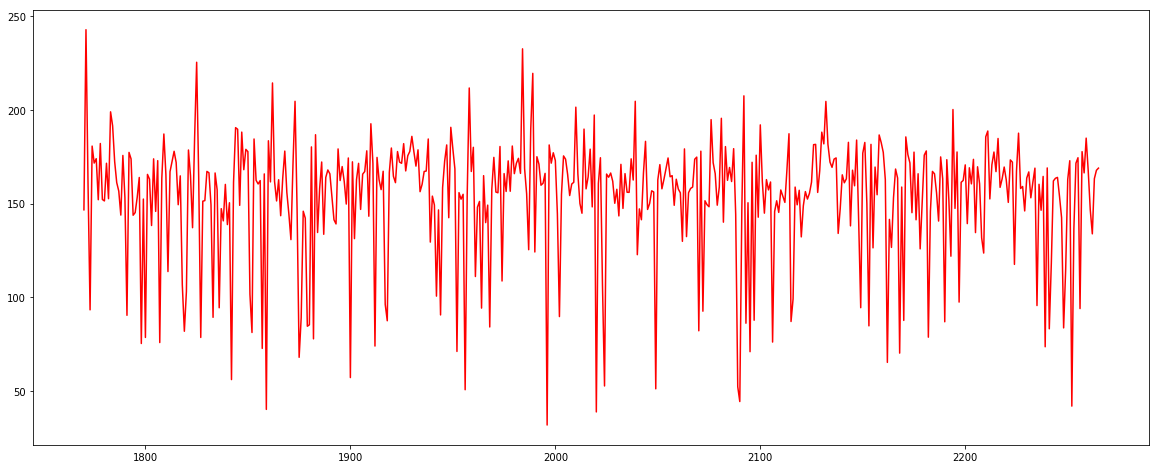

In [184]:
df['F0_sma_amean'].loc[df['class'] == 3.].plot(figsize=(20,8), color='red')
df['F0_sma_amean'].loc[df['class'] == 3.].mean()

In [5]:
#df = pd.read_csv('/home/veerlosar/Desktop/df.csv', encoding='utf-8')
#Unnamed column csv 
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,40.03075,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,40.60280,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,121.68250,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,43.28719,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,41.56385,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127


In [4]:
y = df['class']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
2236    3.0
2237    3.0
2238    3.0
2239    3.0
2240    3.0
2241    3.0
2242    3.0
2243    3.0
2244    3.0
2245    3.0
2246    3.0
2247    3.0
2248    3.0
2249    3.0
2250    3.0
2251    3.0
2252    3.0
2253    3.0
2254    3.0
2255    3.0
2256    3.0
2257    3.0
2258    3.0
2259    3.0
2260    3.0
2261    3.0
2262    3.0
2263    3.0
2264    3.0
2265    3.0
Name: class, Length: 2266, dtype: float64

In [ ]:
df.drop(['class'], axis=1, inplace=True)
df.head()

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.18, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier(n_estimators=250, max_depth=10,
                             random_state=0)
clf.fit(X_train, y_train)

/home/veerlosar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9264705882352942


In [10]:
importances = clf.feature_importances_

print(list(importances).index(max(importances)), max(importances))

473 0.020210622688429155


In [12]:
indices = np.argsort(importances)[::-1]

975

In [ ]:
plt.figure(figsize=(25, 10))
plt.bar(indices, importances[indices])
plt.show()